In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
# import plotly
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation
plt.style.use('ggplot')

%matplotlib inline


In [31]:
from src.Cleaner import *
from src.probeset_preprocessing import *

In [3]:
df = pd.read_csv('data/Colorectal_GSE44076.csv')

In [4]:
df.groupby('type')['type'].count()

type
adenocarcinoma    97
normal            97
Name: type, dtype: int64

In [5]:
target_labels = labels(df)
target_labels

['normal', 'adenocarcinoma']

In [6]:
cleaned_df = data_cleaner(df)
cleaned_df.head()

,target,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,...,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,4.033083,3.991328,3.522487,3.278373,7.201681,2.166355,2.841044,2.217360,2.066134,...,2.233052,2.321627,2.602364,2.272951,8.236181,4.766301,6.624126,2.191907,2.089431,2.196678
1,1,3.117273,4.047258,3.042704,3.284518,8.425413,2.139838,2.632561,2.375537,2.417156,...,2.033923,2.335442,2.061999,1.979024,7.079312,4.687041,5.775218,2.013578,2.189192,2.106554
2,1,3.513162,4.154993,3.067877,3.478020,7.337592,2.070858,2.632643,2.542989,2.371663,...,1.874741,2.522885,2.577079,2.017303,6.966157,3.498785,5.384117,2.124996,2.175054,2.168932
3,1,3.487588,4.505968,3.688899,3.642465,7.319168,2.191685,2.567842,2.551201,2.517034,...,1.795535,2.147798,2.439898,2.157677,8.899968,6.943802,7.908001,1.969787,2.125711,2.311073
4,1,3.096174,3.997803,3.404045,2.984088,7.652969,2.374705,2.178836,2.852997,2.407605,...,1.965137,2.655806,2.330900,2.230463,7.878767,5.718627,6.654383,2.015329,2.339691,2.347252


In [7]:
X = cleaned_df.drop(columns='target')
y = cleaned_df['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35, shuffle=True, random_state=16)

In [9]:
#Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## PCA

33


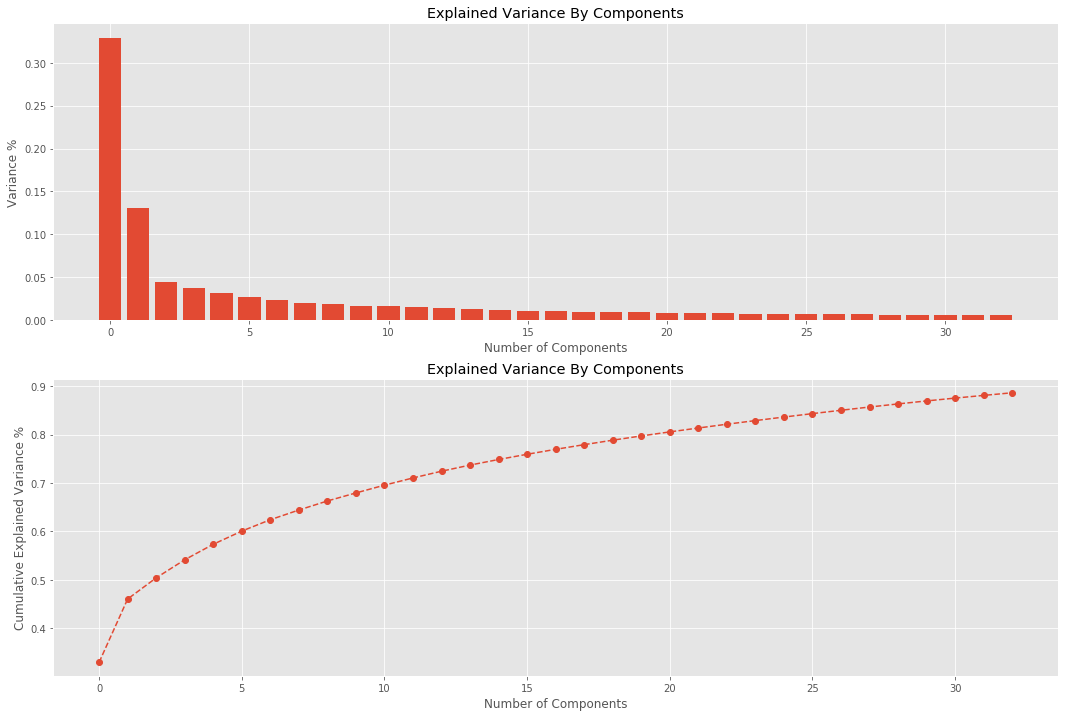

In [10]:
pcd = PCA()
pcd.fit_transform(X_train)
total_variance = sum(pcd.explained_variance_)
curr_variance = 0
k = 0
while curr_variance/total_variance < .80:
    curr_variance += pcd.explained_variance_[k]
    k += 1
    

features = range(k)
pcd = PCA(n_components=k)
X_train_pca = pcd.fit_transform(X_test)
X_test_pca = pcd.transform(X_test)

variance = pcd.explained_variance_ratio_
cumsum_variance = pcd.explained_variance_ratio_.cumsum()

fig, axs = plt.subplots(2,1, figsize=(18,12))
ax = axs.flatten()
ax[0].bar(features, variance)
ax[0].set_ylabel('Variance %')
ax[0].set_xlabel('Number of Components')
ax[0].set_title('Explained Variance By Components')


ax[1].plot(features, cumsum_variance, marker='o', linestyle='--')
ax[1].set_ylabel('Cumulative Explained Variance %')
ax[1].set_xlabel('Number of Components')
ax[1].set_title('Explained Variance By Components')
print(k)

In [11]:
pca3 = PCA(n_components=3).fit(X_train)
reduced_X_train = pca3.transform(X_train)

# x = reduced_X_train[:,0]
# y = reduced_X_train[:,1]
# z = reduced_X_train[:,2]

# trace1 = go.Scatter3d(
#         x=x,
#         y=y,
#         z=z,
#         mode='markers',
#         marker=dict(
#         size=12,
#         color=y_train,
#         colorscale='Viridis',
#         opacity=0.8))

# data = [trace1]
# layout = go.Layout(
#         margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0,)
# )

# fig = go.Figure(data=data, layout=layout)
# iplot(fig, filename='PCA 3d plot')

[]

<Figure size 432x288 with 0 Axes>

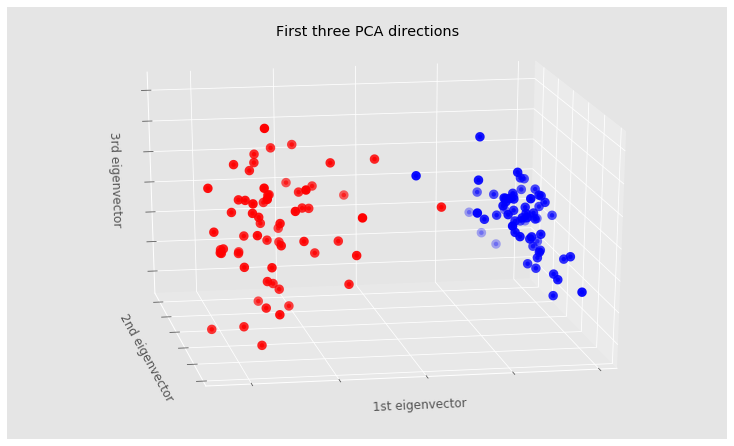

In [12]:
pca3 = PCA(n_components=3).fit(X_train)
X_train_reduced = pca3.transform(X_train)

plt.clf()
fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig, elev=-160, azim=100,)
ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], X_train_reduced[:, 2], c = np.array(['red','blue'])[y_train], cmap = plt.cm.Paired, linewidths=5)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])



Text(0.5, 1.0, 'Scatterplot in PCA 2-Plane')

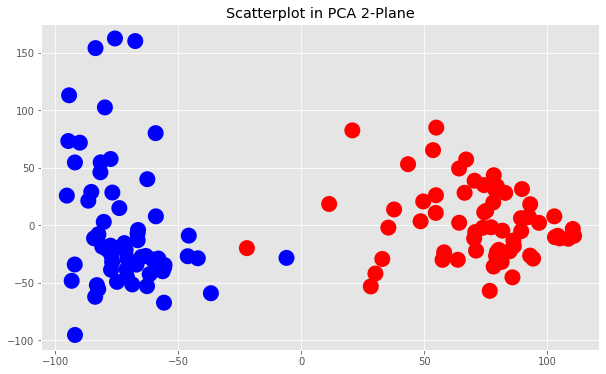

In [13]:
fig = plt.figure(1, figsize = (10, 6))
plt.scatter(X_train_reduced[:, 0],  X_train_reduced[:, 1], c = np.array(['red','blue'])[y_train], cmap = plt.cm.Paired, linewidths=10)
plt.title("Scatterplot in PCA 2-Plane")

## Starting with a baseline Model

### Random Forest

In [113]:
rfmodel = RandomForestClassifier(n_estimators=100, criterion='entropy')

rfmodel.fit(X_train, y_train)

rf_pred = rfmodel.predict(X_test)

rf_accuracy = round(accuracy_score(y_test, rf_pred), 3)
print('Random Forest Accuracy:\n', rf_accuracy)

Random Forest Accuracy:
 0.971


#### Accuracy seems good, we'll do a grid serach CV to fine tune the hyperparameters

In [15]:
rf_grid_param = {'bootstrap':[False, True],
                'n_estimators': [50,100,150,200,250,500],
                'max_depth': [5,10,15,20,25,30,35],
                'min_samples_split': [5,10,15],
                'min_samples_leaf': [10,15,20,25]}

rf_estimator = RandomForestClassifier()

rf_model = GridSearchCV(estimator=rf_estimator, param_grid=rf_grid_param, cv=5, scoring='accuracy', n_jobs=-1)

rf_model.fit(X_train, y_train)

rf_best = rf_model.best_estimator_

C:\Users\tupha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters:
 {'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
Tuned Random Forest Accuracy:
 0.971


(0, 2)

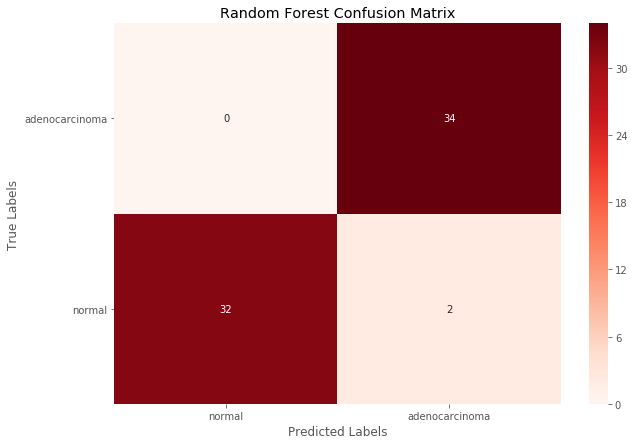

In [94]:
print('Best parameters:\n', rf_model.best_params_)

rf_pred = rf_best.predict(X_test)

print('Tuned Random Forest Accuracy:\n', round(accuracy_score(y_test, rf_pred), 3))
rf_cm = confusion_matrix(y_test, rf_pred)

fig, ax = plt.subplots(figsize=(10,7))

sns.heatmap(rf_cm, annot=True, ax = ax, cmap='Reds')

#Set axes labels
ax.set_title('Random Forest Confusion Matrix')
ax.set_ylabel('True Labels')
ax.set_xlabel('Predicted Labels')

#Set tick labels
ax.xaxis.set_ticklabels(target_labels)
ax.yaxis.set_ticklabels(target_labels, rotation=360)
ax.set_ylim([0,2])

### Naive Bayes Model

Naive Bayes Accuracy: 0.985


(0, 2)

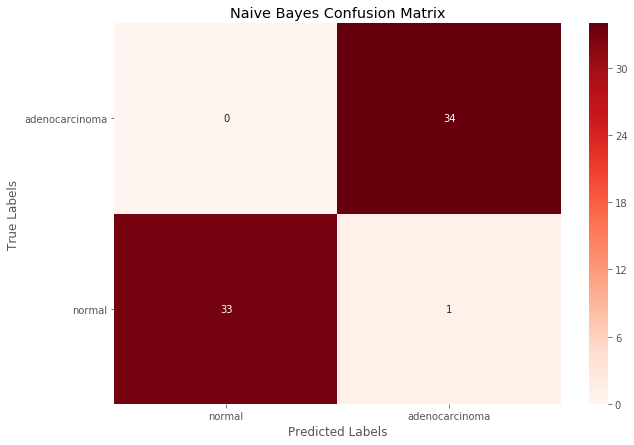

In [96]:
#Since the predictors/genes are continuous, we will use the gaussian Naive Bayes

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

print('Naive Bayes Accuracy:', round(accuracy_score(y_test, nb_pred), 3))

nb_cm = confusion_matrix(y_test, nb_pred)

fig, ax = plt.subplots(figsize=(10,7))

sns.heatmap(nb_cm, annot=True, ax = ax, cmap='Reds')

#Set axes labels
ax.set_title('Naive Bayes Confusion Matrix')
ax.set_ylabel('True Labels')
ax.set_xlabel('Predicted Labels')

#Set tick labels
ax.xaxis.set_ticklabels(target_labels)
ax.yaxis.set_ticklabels(target_labels, rotation=360)

ax.set_ylim([0,2])

### K Means Clustering

K Means Clustering Accuracy:
 0.971


(0, 2)

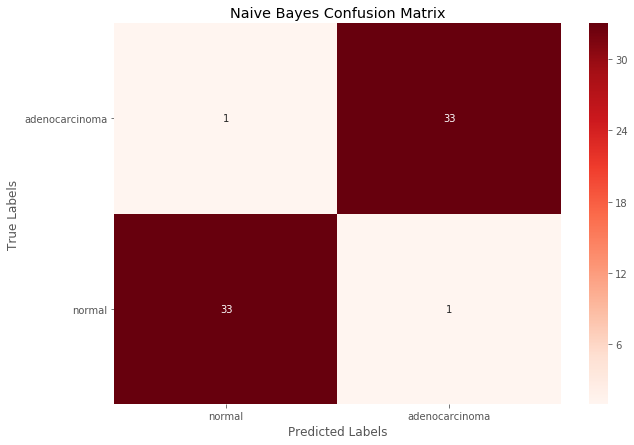

In [100]:
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(X_train_pca)
km_pred = kmeans.predict(X_test_pca)

print('K Means Clustering Accuracy:\n', round(accuracy_score(y_test, km_pred), 3))

fig, ax = plt.subplots(figsize=(10,7))

km_cm = confusion_matrix(y_test, km_pred)

sns.heatmap(km_cm, annot=True, ax=ax, cmap='Reds')

ax.set_title('Naive Bayes Confusion Matrix')
ax.set_ylabel('True Labels')
ax.set_xlabel('Predicted Labels')

#Set tick labels
ax.xaxis.set_ticklabels(target_labels)
ax.yaxis.set_ticklabels(target_labels, rotation=360)

ax.set_ylim([0,2])

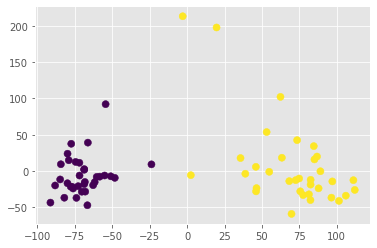

In [19]:
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=km_pred, s=50, cmap='viridis')


## Lasso

In [20]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(X_train_scaled, y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [21]:
#Index wise numpy array of features/genes that lasso thought was important. False for features whose weights were shrunk to zero.
sel_.get_support()

selected_feats = X_train.columns[(sel_.get_support())]

print('Total features: ', X_train.shape[1])
print('Selected features: ', len(selected_feats))
print('Features with coefficients that converged to zero: ', np.sum(sel_.estimator_.coef_ == 0))

Total features:  49386
Selected features:  101
Features with coefficients that converged to zero:  49285


In [22]:
logmodel = LogisticRegression(solver='liblinear', penalty='l1')
logmodel.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
log_pred = logmodel.predict(X_test_scaled)

In [24]:
log_loss(y_test, log_pred)

9.992007221626415e-16

In [25]:
np.array(X.columns).shape

(49386,)

In [26]:
arr = dict(zip(np.array(X.columns), logmodel.coef_.reshape(X.columns.shape[0])))
arr

filtered_arr = dict()

for key, value in arr.items():
    if value != 0:
        filtered_arr[key] = value
        
len(filtered_arr)

{k: v for k, v in sorted(filtered_arr.items(), key=lambda item: item[1])}

{'11758028_s_at': -0.2186107860553943,
 '11719434_a_at': -0.20547660825322983,
 '11750604_a_at': -0.14012415465721273,
 '11721124_s_at': -0.13059768344604544,
 '11728232_a_at': -0.11900453149811142,
 '11729574_at': -0.10989849875129629,
 '11718930_a_at': -0.09789621984380811,
 '11719562_at': -0.09033781969718047,
 '11728607_a_at': -0.08896025069107977,
 '11715865_a_at': -0.08444450242486165,
 '11750189_s_at': -0.08391157439663283,
 '11739128_a_at': -0.08169829559839462,
 '11728234_a_at': -0.08108507729847352,
 '11747996_a_at': -0.0804342720695597,
 '11722199_at': -0.07816387185612525,
 '11744718_a_at': -0.07315271541315918,
 '11722783_at': -0.07202681417190117,
 '11720032_a_at': -0.06877555765362368,
 '11715352_x_at': -0.06542328289520613,
 '11746931_a_at': -0.06287403259453758,
 '11741057_a_at': -0.06111113171120989,
 '11744030_a_at': -0.060289592142312984,
 '11726432_a_at': -0.05373025293774739,
 '11746497_a_at': -0.04932984563580223,
 '11742938_at': -0.04807416927120657,
 '11721993_

### Feature Importance

In [32]:
#Getting the geneID for their respective probeset

probeset, columns = get_geneID('GSE44076','GSM1077598', 'GPL13667')

15-May-2020 10:42:32 DEBUG utils - Directory ./ already exists. Skipping.
15-May-2020 10:42:32 INFO GEOparse - File already exist: using local version.
15-May-2020 10:42:32 INFO GEOparse - Parsing ./GSE44076_family.soft.gz: 
15-May-2020 10:42:32 DEBUG GEOparse - DATABASE: GeoMiame
15-May-2020 10:42:32 DEBUG GEOparse - SERIES: GSE44076
15-May-2020 10:42:32 DEBUG GEOparse - PLATFORM: GPL13667
C:\Users\tupha\Anaconda3\lib\site-packages\GEOparse\GEOparse.py:104: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  return parse_GSE(filepath)
15-May-2020 10:42:36 DEBUG GEOparse - SAMPLE: GSM1077598
15-May-2020 10:42:36 DEBUG GEOparse - SAMPLE: GSM1077599
15-May-2020 10:42:36 DEBUG GEOparse - SAMPLE: GSM1077600
15-May-2020 10:42:37 DEBUG GEOparse - SAMPLE: GSM1077601
15-May-2020 10:42:37 DEBUG GEOparse - SAMPLE: GSM1077602
15-May-2020 10:42:37 DEBUG GEOparse - SAMPLE: GSM1077603
15-May-2020 10:42:37 DEBUG GEOparse - SAMPLE: GSM1077604
15-May-2

In [78]:
feat_scores = pd.DataFrame({'LogModel Coefficients': logmodel.coef_.reshape(X.columns.shape[0])},
                           index=X.columns)

df1 = feat_scores.sort_values(by='LogModel Coefficients')[:15]
df2 = feat_scores.sort_values(by='LogModel Coefficients')[-15:]

top_40 = df1.append(df2).reset_index()

#Update ID column
bool_mask = probeset['ID'].isin(top_40.reset_index()['index'])
probeset[bool_mask]


probeset[bool_mask]

top_40.reset_index()
top_40.rename({'index': 'ID'}, axis=1, inplace=True)

top_40 = pd.merge(top_40, probeset[bool_mask], on="ID").set_index('Gene Symbol')
top_40

,ID,LogModel Coefficients,GB_LIST,Gene Title
Gene Symbol,,,,
FOXQ1,11758028_s_at,-0.218611,NM_033260,forkhead box Q1
ETV4,11719434_a_at,-0.205477,"NM_001079675,NM_001986",ets variant 4
GTF2IRD1,11750604_a_at,-0.140124,"NM_005685,NM_016328",GTF2I repeat domain containing 1
MMP11,11721124_s_at,-0.130598,NM_005940,matrix metallopeptidase 11 (stromelysin 3)
CLDN1,11728232_a_at,-0.119005,NM_021101,claudin 1
ENC1,11729574_at,-0.109898,NM_003633,ectodermal-neural cortex 1 (with BTB-like domain)
TGIF2,11718930_a_at,-0.097896,NM_021809,TGFB-induced factor homeobox 2
SOX4,11719562_at,-0.090338,NM_003107,SRY (sex determining region Y)-box 4
GRIN2D,11728607_a_at,-0.088960,NM_000836,"glutamate receptor, ionotropic, N-methyl D-asp..."


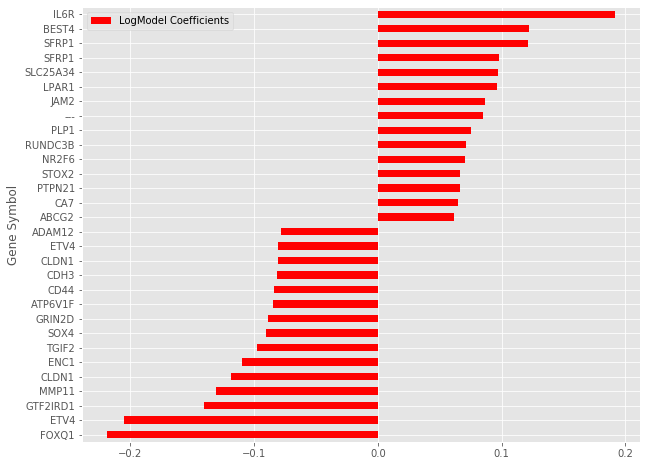

In [83]:
top_40.plot(kind='barh', figsize=(10,8), color='red')

In [85]:
important_genes = top_40.drop(columns='LogModel Coefficients')
important_genes

,ID,GB_LIST,Gene Title
Gene Symbol,,,
FOXQ1,11758028_s_at,NM_033260,forkhead box Q1
ETV4,11719434_a_at,"NM_001079675,NM_001986",ets variant 4
GTF2IRD1,11750604_a_at,"NM_005685,NM_016328",GTF2I repeat domain containing 1
MMP11,11721124_s_at,NM_005940,matrix metallopeptidase 11 (stromelysin 3)
CLDN1,11728232_a_at,NM_021101,claudin 1
ENC1,11729574_at,NM_003633,ectodermal-neural cortex 1 (with BTB-like domain)
TGIF2,11718930_a_at,NM_021809,TGFB-induced factor homeobox 2
SOX4,11719562_at,NM_003107,SRY (sex determining region Y)-box 4
GRIN2D,11728607_a_at,NM_000836,"glutamate receptor, ionotropic, N-methyl D-asp..."


In [28]:
y_probs = logmodel.predict_proba(X_test)

(0, 2)

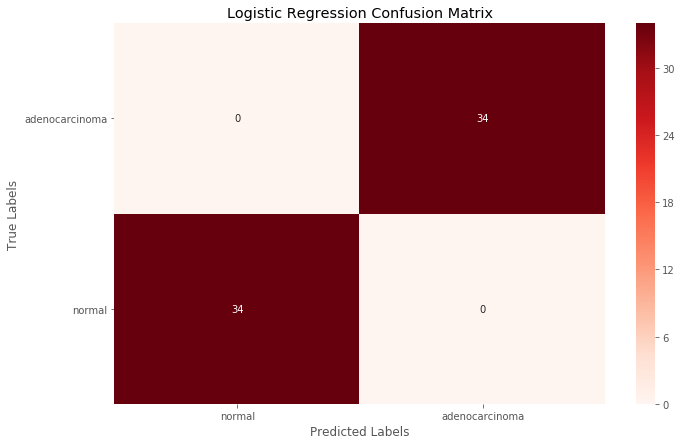

In [105]:
cm_log = confusion_matrix(y_test, log_pred)

fig, ax = plt.subplots(figsize=(11,7))
sns.heatmap(cm_log, annot=True, ax=ax, cmap='Reds')

ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('True Labels')
ax.set_xlabel('Predicted Labels')

#Set tick labels
ax.xaxis.set_ticklabels(target_labels)
ax.yaxis.set_ticklabels(target_labels, rotation=360)

ax.set_ylim([0,2])